In [51]:
from dask.distributed import Client

client = Client(n_workers=4)

#import dask
#dask.config.set(scheduler='threaded')

/Users/huangherbert/opt/anaconda3/envs/parallel_computing/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [52]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [53]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)  # 1 second
y = inc(2)  # 1 second
z = add(x, y)  # 1 second

CPU times: user 267 ms, sys: 54.8 ms, total: 322 ms
Wall time: 3.01 s


In [54]:
from dask import delayed

In [55]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)  # create a task for x=inc(1)
y = delayed(inc)(2)  # create a task for y=inc(2)
z = delayed(add)(x, y)  # create a task for add(x,y)

CPU times: user 800 µs, sys: 645 µs, total: 1.44 ms
Wall time: 951 µs


In [56]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 233 ms, sys: 60.5 ms, total: 293 ms
Wall time: 2.05 s


5

In [57]:
z

Delayed('add-53d4ddb7-3973-47a6-ad28-5fbe8a3d0d40')

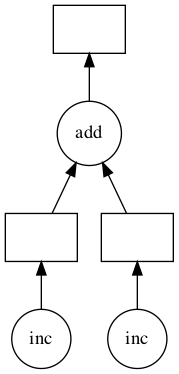

In [58]:
# Look at the task graph for `z`
z.visualize()

In [10]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [59]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 690 ms, sys: 141 ms, total: 830 ms
Wall time: 8.03 s


In [60]:
total

44

In [61]:
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

In [14]:
total

Delayed('sum-86afa0ee-5d21-499b-8b90-e3a3344fd68e')

In [62]:
%%time
total.compute()

CPU times: user 103 ms, sys: 21.6 ms, total: 125 ms
Wall time: 1.04 s


44

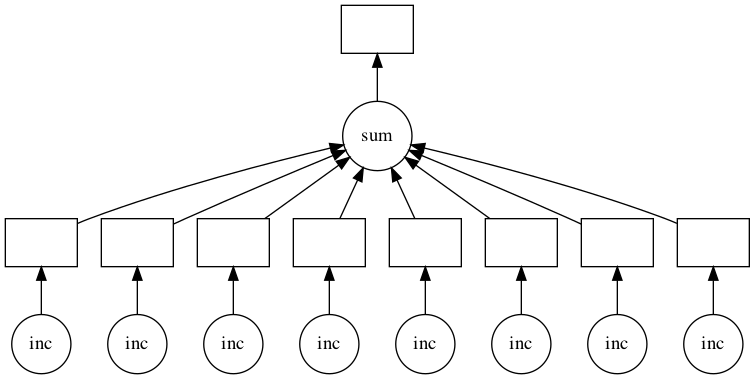

In [63]:
total.visualize()

In [65]:
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [66]:
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z

dask.array<mean_agg-aggregate, shape=(5000,), dtype=float64, chunksize=(500,), chunktype=numpy.ndarray>

In [67]:
%%time
z.compute()

CPU times: user 487 ms, sys: 71.7 ms, total: 559 ms
Wall time: 1.67 s


array([1.00380966, 0.98755841, 0.99820909, ..., 0.99470313, 0.9974527 ,
       1.00007836])

In [24]:
import numpy as np
x = np.random.rand(10000, 10000)

In [25]:
x

array([[0.64251698, 0.78852753, 0.56854502, ..., 0.26646427, 0.34313085,
        0.6613253 ],
       [0.72854421, 0.77321669, 0.6073177 , ..., 0.394851  , 0.33727878,
        0.17090715],
       [0.43890135, 0.37319634, 0.69565419, ..., 0.52110654, 0.70302631,
        0.85582925],
       ...,
       [0.75964534, 0.83164109, 0.81479609, ..., 0.68171865, 0.84233075,
        0.49286425],
       [0.32553164, 0.28724308, 0.98610836, ..., 0.30486943, 0.45640455,
        0.45511313],
       [0.82804768, 0.75095433, 0.20869975, ..., 0.60390305, 0.59385264,
        0.52481446]])

In [28]:
%%time
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z

CPU times: user 1.46 s, sys: 364 ms, total: 1.83 s
Wall time: 1.84 s


array([0.99689301, 1.001693  , 0.99211702, ..., 0.99876898, 1.00430649,
       1.00250803])

In [27]:
z

array([0.99689301, 1.001693  , 0.99211702, ..., 0.99876898, 1.00430649,
       1.00250803])